# Manhattan Rolling Sales Exploratory Analysis

In [1]:
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# import cleaned data

df = pd.read_csv('../data/processed/rollingsales_manhattan_clean.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,0,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,376,24,C0,264 EAST 7TH STREET,10009,3,0,3,2059,3696,1900,7738700,2016-12-22
1,1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,375,28,C4,738 EAST 6TH STREET,10009,11,0,11,1750,6500,1900,3750000,2017-04-03
2,2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,385,36,C7,27 AVENUE C,10009,24,1,25,2650,9960,1910,5235000,2017-07-11
3,3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,5,C2,151 AVENUE B,10009,5,0,5,2139,4416,1900,0,2017-06-16
4,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,6625000,2017-07-19


In [3]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,376,24,C0,264 EAST 7TH STREET,10009,3,0,3,2059,3696,1900,7738700,2016-12-22
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,375,28,C4,738 EAST 6TH STREET,10009,11,0,11,1750,6500,1900,3750000,2017-04-03
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,385,36,C7,27 AVENUE C,10009,24,1,25,2650,9960,1910,5235000,2017-07-11
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,5,C2,151 AVENUE B,10009,5,0,5,2139,4416,1900,0,2017-06-16
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,6625000,2017-07-19


In [4]:
df['GROSS SQUARE FEET'].describe()

count      1634.00
mean      33358.72
std      120076.13
min           1.00
25%        4111.75
50%        7887.50
75%       18657.50
max     2155492.00
Name: GROSS SQUARE FEET, dtype: float64

In [5]:
df['SALE PRICE'].describe()

count         1634.00
mean      10927966.54
std       69127217.52
min              0.00
25%              0.00
50%        1160515.50
75%        7211250.00
max     2210000000.00
Name: SALE PRICE, dtype: float64

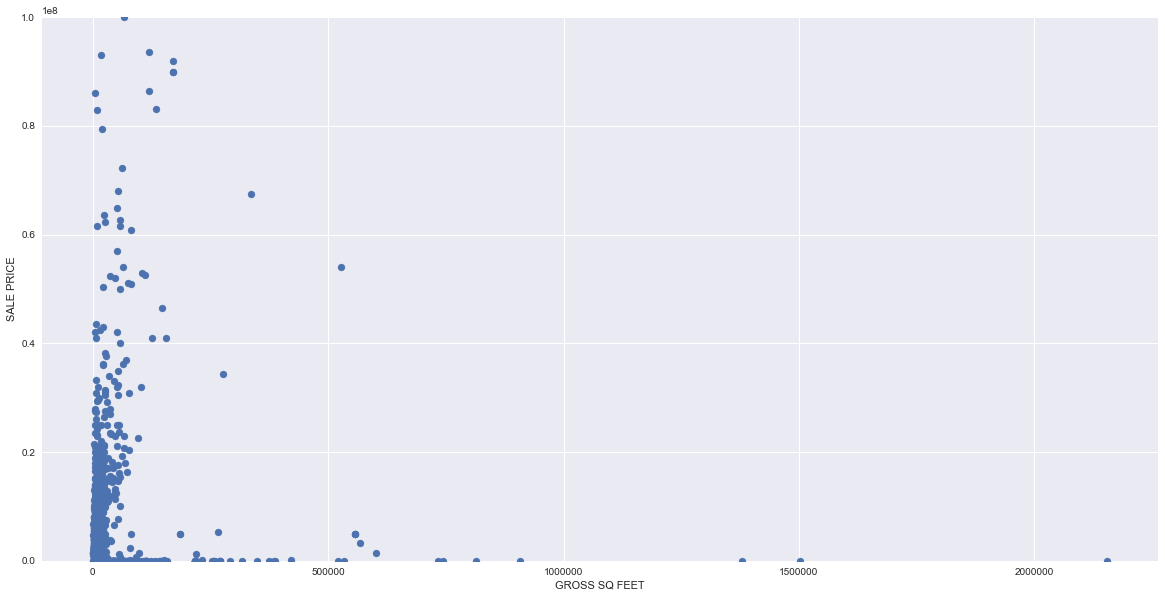

In [6]:
x,y = df['GROSS SQUARE FEET'], df['SALE PRICE']
plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.ylim([0,100000000])
plt.xlabel('GROSS SQ FEET')
plt.ylabel('SALE PRICE')
plt.show()

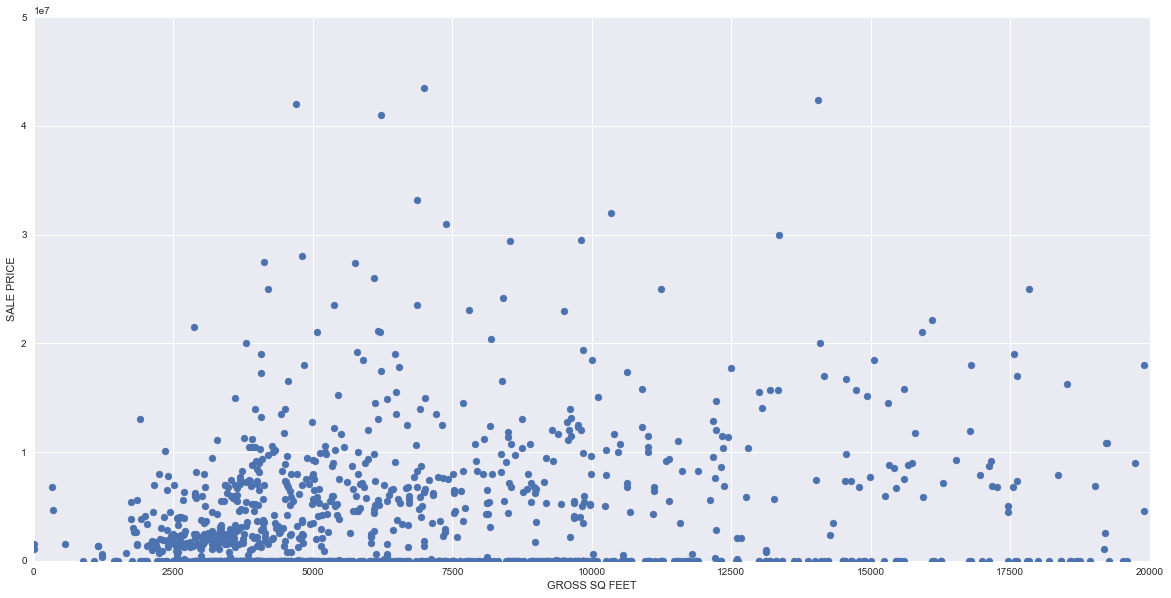

In [7]:
plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.xlabel('GROSS SQ FEET')
plt.ylabel('SALE PRICE')
plt.ylim([0,50000000])
plt.xlim([0,20000])
plt.show()

In [8]:
expensive_properties = df[df['SALE PRICE'] > 500000000]
expensive_properties

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
199,1,FASHION,21 OFFICE BUILDINGS,833,11,O4,1250 BROADWAY,10001,0,55,55,30750,645977,1969,565000000,2016-11-01
221,1,FINANCIAL,21 OFFICE BUILDINGS,29,1,O4,85 BROAD STREET,10004,0,1,1,42762,993570,1983,652000000,2017-05-24
223,1,FINANCIAL,21 OFFICE BUILDINGS,40,3,O4,60 WALL STREET,10005,0,1,1,53632,1617206,1987,1040000000,2017-01-24
920,1,KIPS BAY,08 RENTALS - ELEVATOR APARTMENTS,934,1,D6,460-520 2ND AVENUE,10016,894,8,902,141836,829024,1975,620000000,2016-12-08
1026,1,MIDTOWN CBD,21 OFFICE BUILDINGS,1301,1,O4,245 PARK AVENUE,10167,0,35,35,81336,1586876,1966,2210000000,2017-05-05


In [9]:
extremely_large_properties = df[df['GROSS SQUARE FEET'] > 35000]
extremely_large_properties.head(20)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
15,1,ALPHABET CITY,11A CONDO-RENTALS,385,1102,RR,254 EAST 2ND STREET,10009,47,0,47,0,36472,2005,28000000,2016-10-13
16,1,ALPHABET CITY,11A CONDO-RENTALS,397,1301,RR,250 EAST HOUSTON STREET,10002,132,0,132,33650,110432,1989,52625000,2016-10-19
21,1,ALPHABET CITY,37 RELIGIOUS FACILITIES,399,11,M9,206 EAST 4TH STREET,10009,0,1,1,32246,39246,1900,0,2017-01-13
53,1,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,700,27,D6,509 WEST 28TH STREET,10001,210,1,211,12344,269584,2014,0,2017-05-25
54,1,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,700,42,D6,512 WEST 29TH STREET,10001,210,1,211,4937,269584,2014,0,2017-05-25
55,1,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,700,44,D6,516 WEST 29TH STREET,10001,210,1,211,2468,269584,2014,0,2017-05-25
56,1,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,700,45,D6,518 WEST 29TH STREET,10001,210,1,211,4937,269584,2014,0,2017-05-25
57,1,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,717,19,D1,417 WEST 19TH STREET,10011,36,0,36,29275,45420,1965,0,2017-08-25
58,1,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,773,27,D7,225 WEST 23RD STREET,10011,127,11,138,12961,66524,1930,100000000,2017-08-31
59,1,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,773,56,D1,220 WEST 24TH STREET,10011,118,0,118,12961,57207,1930,0,2017-08-31


Notes: Dataset is very noisy, there are a handful of really expensive and large properties that drive up the mean and standard deviation. Some properties also have a sale price of 0 (they may be passed down from parents to children or for other reasons). Fitting a linear model (sq ft vs price) over the whole dataset would be interesting to see, but I doubt it will be much useful. But we'll go with this data and see if the K-NN algorithm will reveal something interesting.

### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# we'll split the data into train and test set, using 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(
    df['GROSS SQUARE FEET'], df['SALE PRICE'], test_size=0.25, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1225,) (1225,)
(409,) (409,)


In [11]:
lm = LinearRegression()
lm.fit(X_train.values.reshape(-1,1), y_train)

y_preds = lm.predict(X_test.values.reshape(-1,1))

print('R2-score:', lm.score(X_test.values.reshape(-1,1), y_test)) # negative r-score...does that make sense?

# The coefficients
print('Coefficients: ', lm.coef_)
print('Intercept: ', lm.intercept_)
print('Mean Squared Error:', mean_squared_error(y_test, y_preds))


R2-score: -0.133251691679
Coefficients:  [ 389.62872545]
Intercept:  -1189932.31805
Mean Squared Error: 3.54562453072e+15


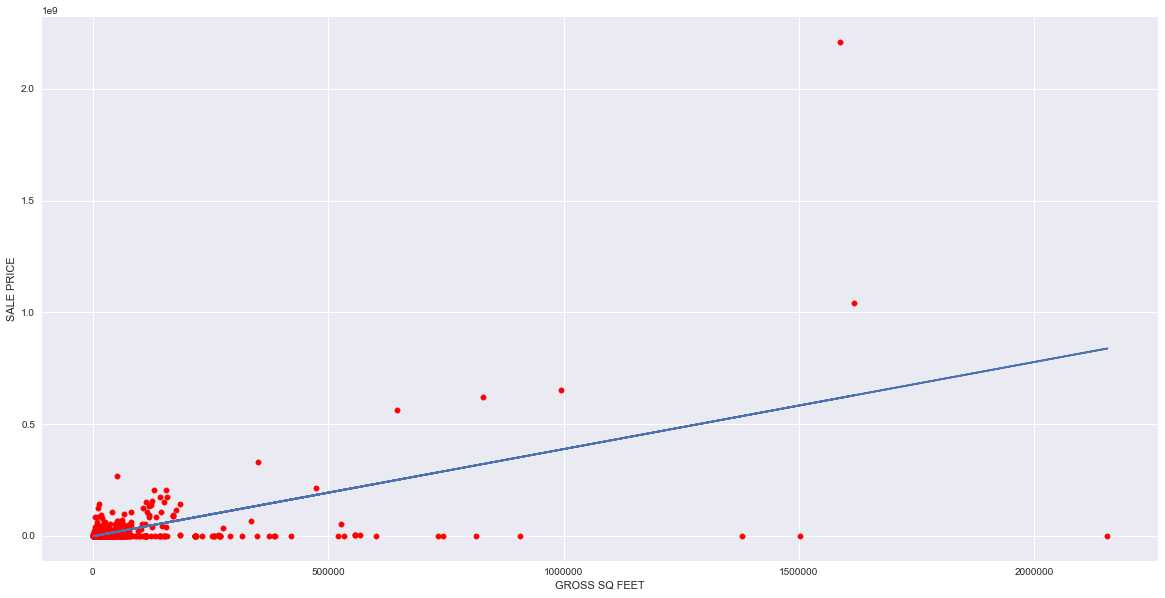

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(x.values.reshape(-1,1),y, s=30, c='r')
plt.plot(X_test.values.reshape(-1,1),y_preds)
plt.xlabel('GROSS SQ FEET')
plt.ylabel('SALE PRICE')
plt.show()

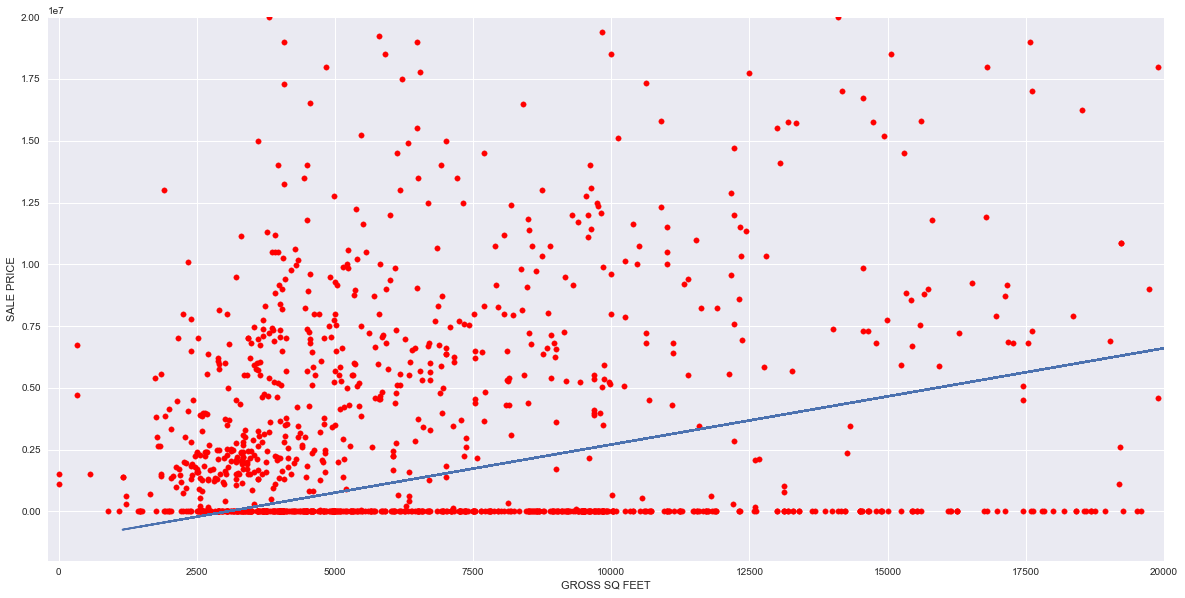

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(x.values.reshape(-1,1),y, s=30, c='r')
plt.plot(X_test.values.reshape(-1,1),y_preds)
plt.xlabel('GROSS SQ FEET')
plt.ylabel('SALE PRICE')
plt.ylim([-2000000,20000000])
plt.xlim([-200,20000])
plt.show()

### Simple K-Nearest Neighbor Regression

Here we perform a simple 1D K-NN regression with the only feature being the gross sq feet and the target value sale price. We then plot the results with different number of neighbors to see if there is any interesting trends.

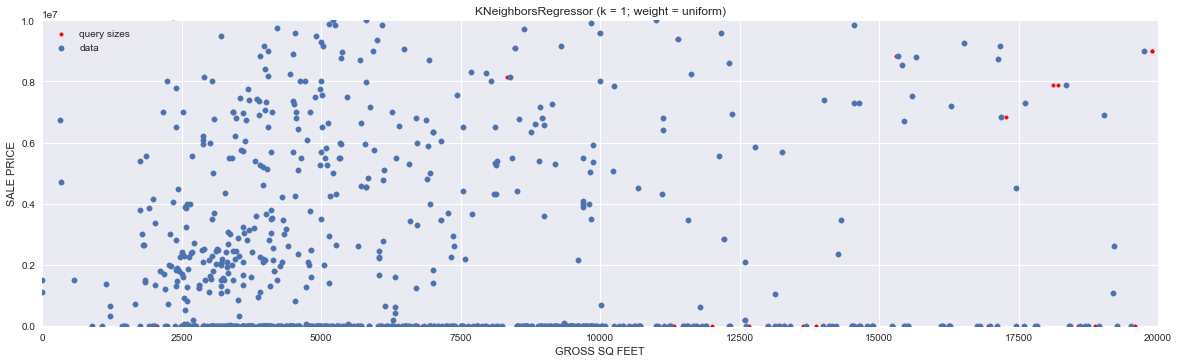

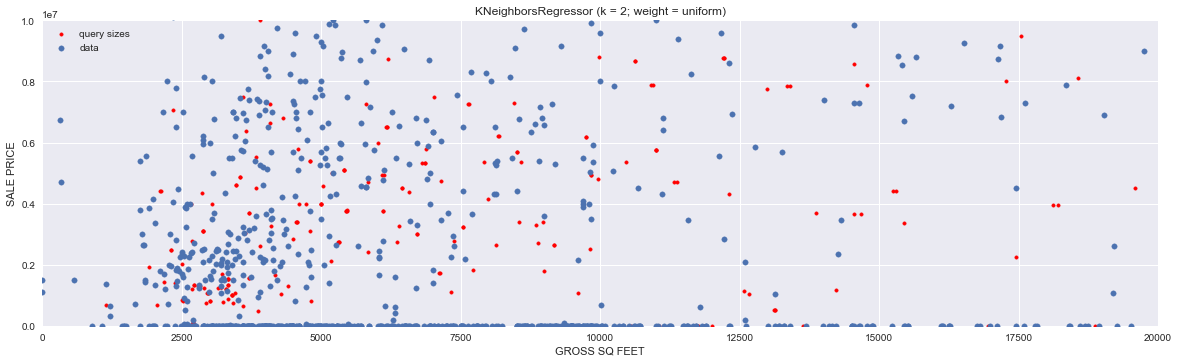

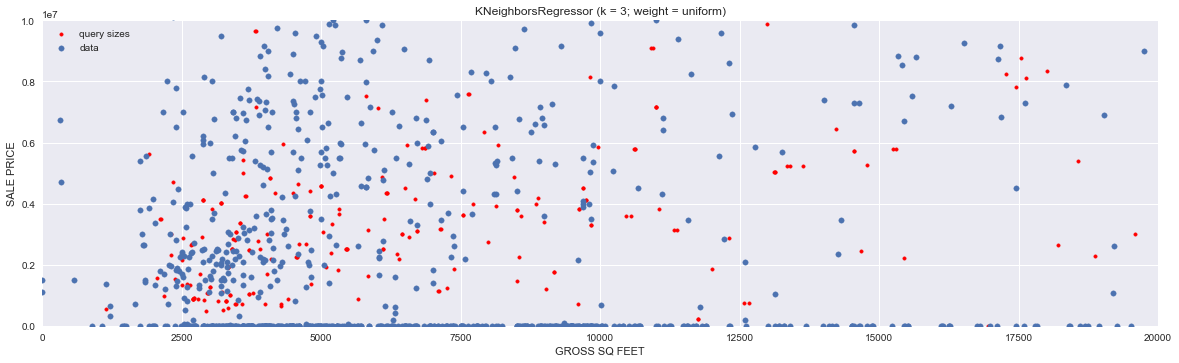

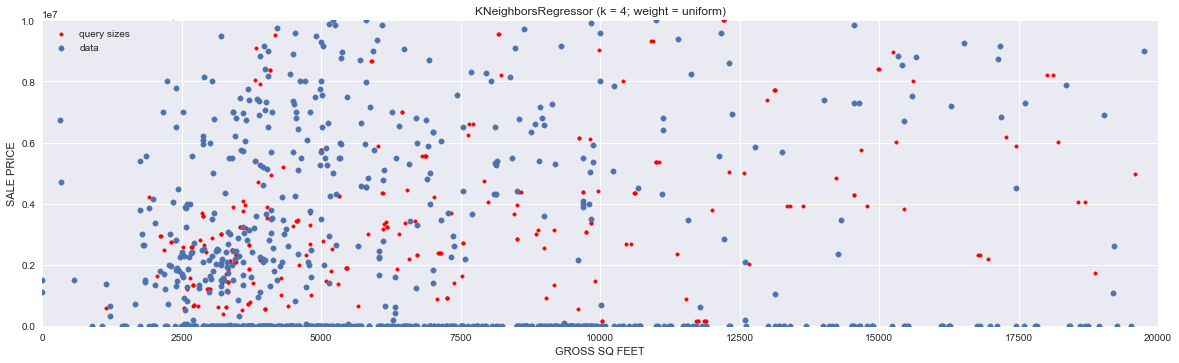

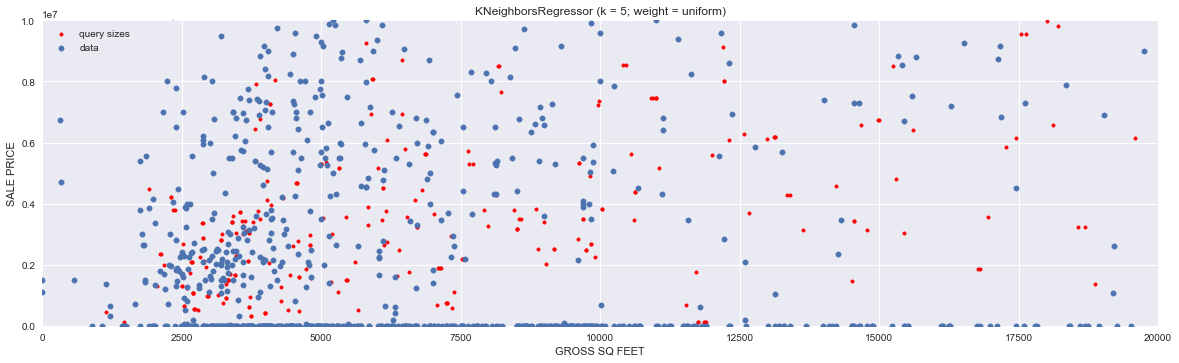

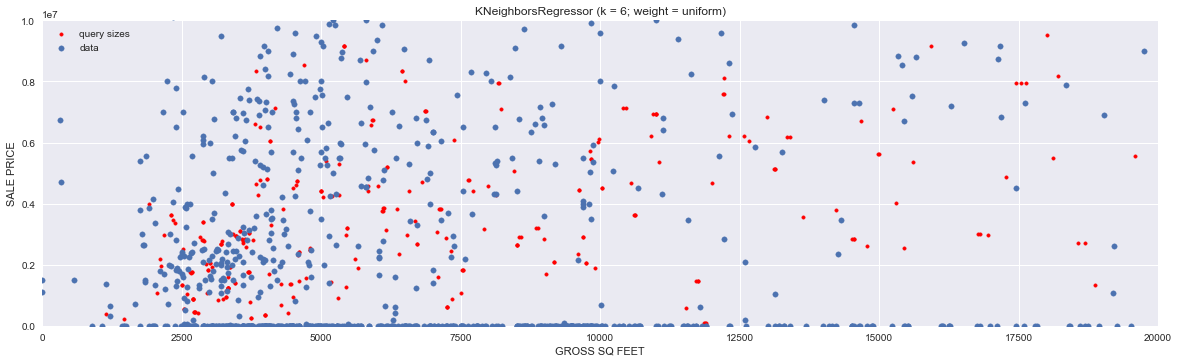

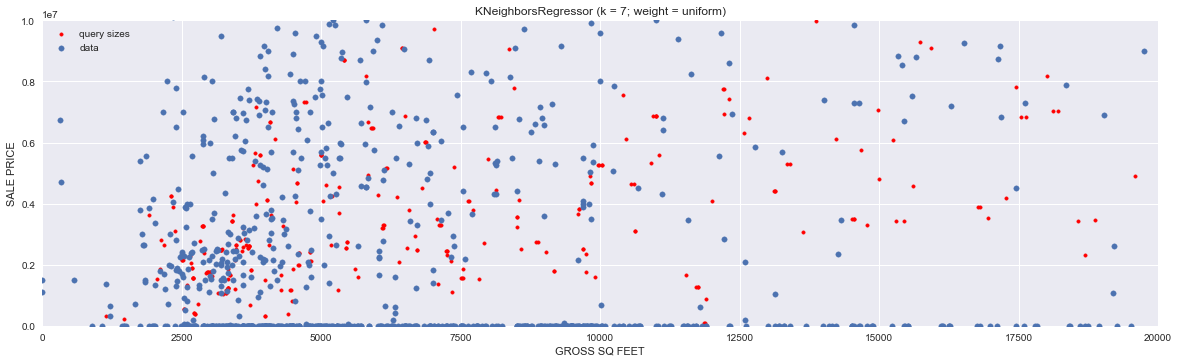

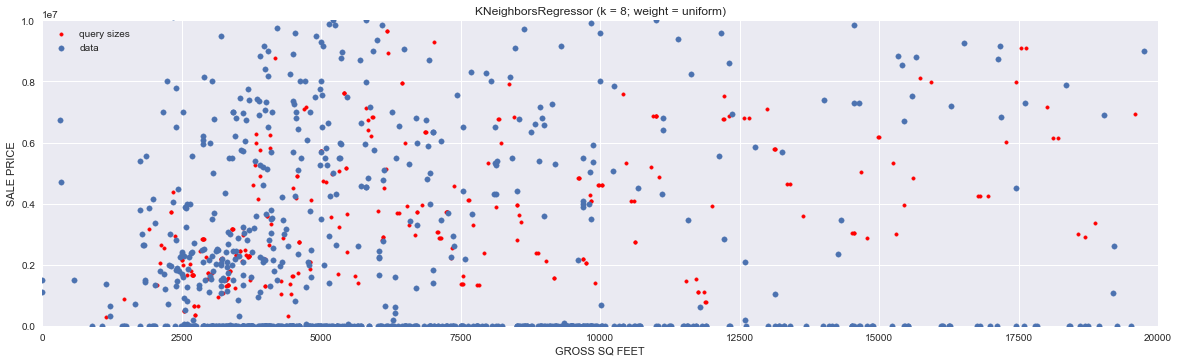

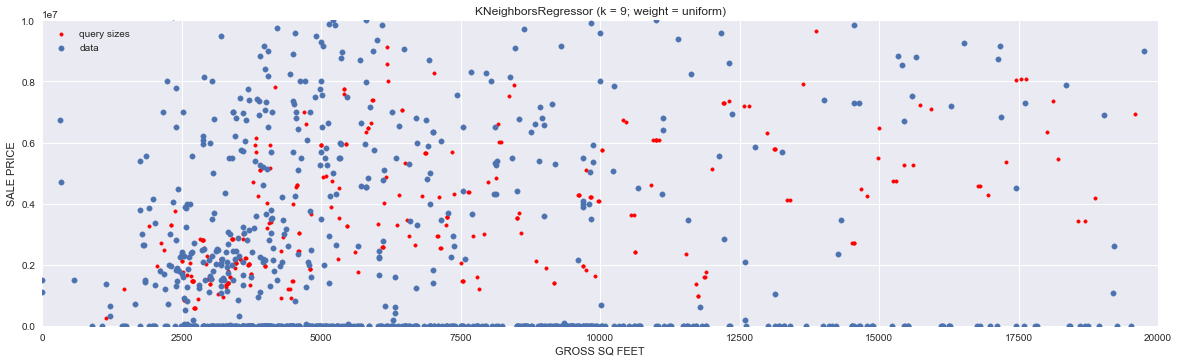

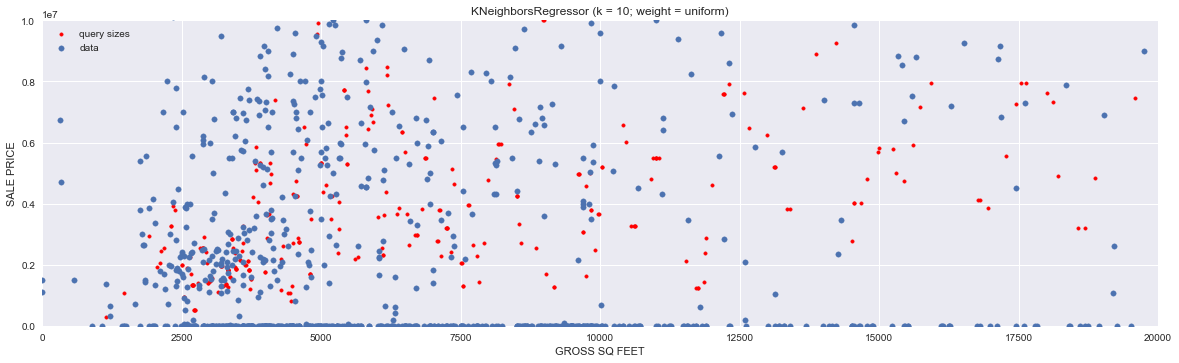

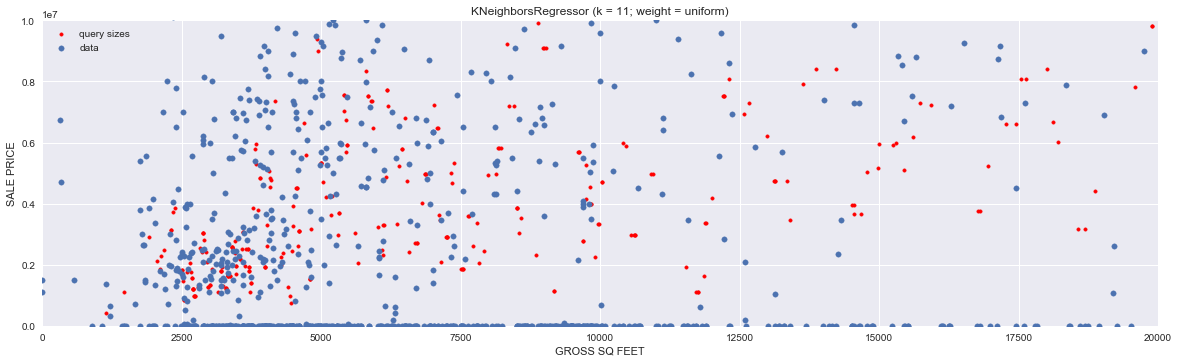

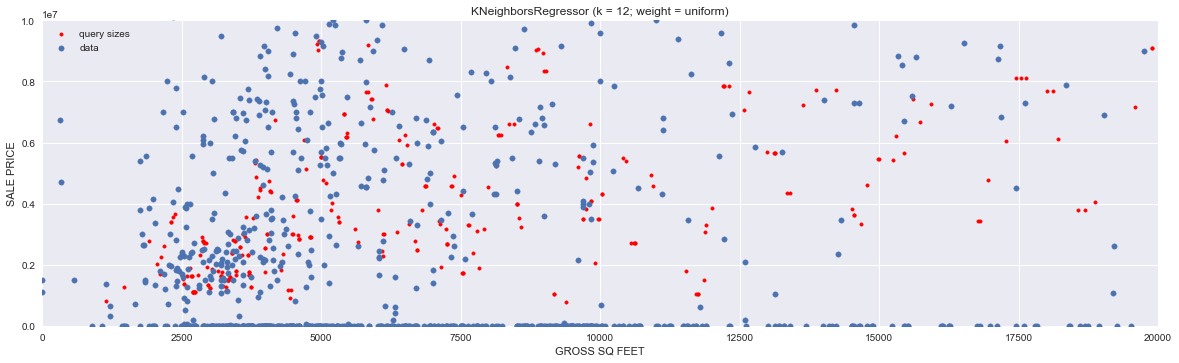

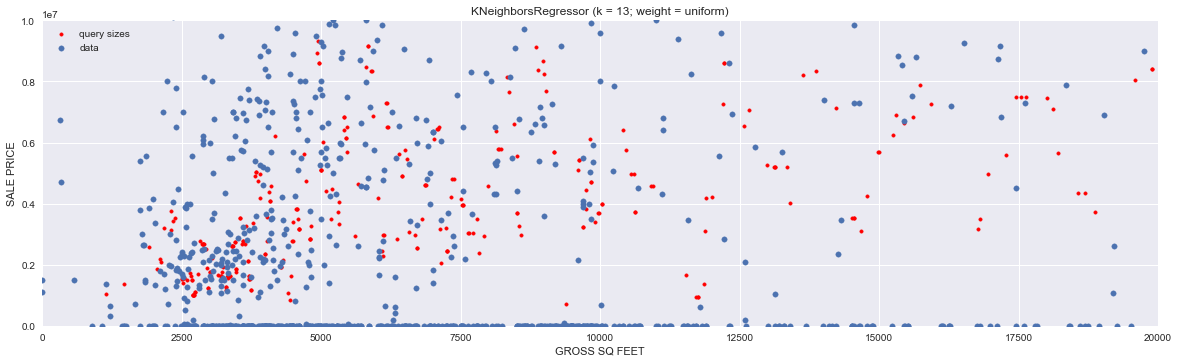

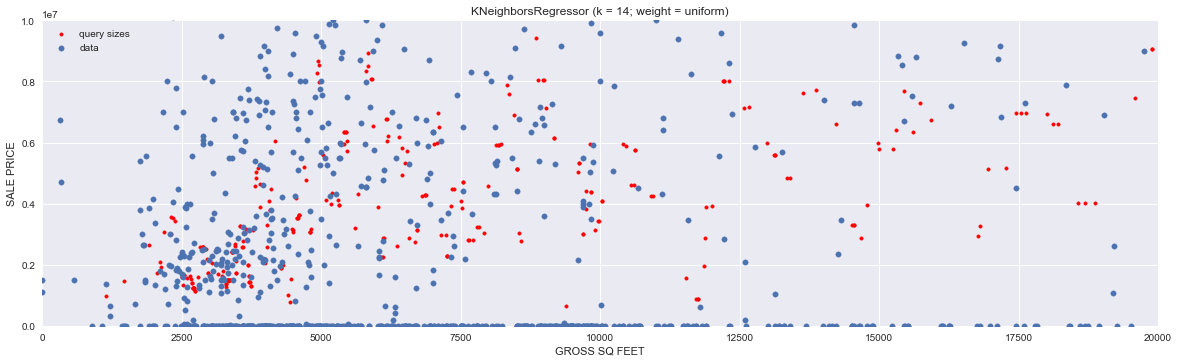

In [18]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(1,15):

    knn = KNeighborsRegressor(n_neighbors=n) # default neighbor = 1; default weight = uniform
    knn.fit(X_train.values.reshape(-1,1), y_train)

    y_preds = knn.predict(X_test.values.reshape(-1,1))
    
    plt.figure(figsize=(20, 100))
    plt.subplot(15, 1, n)
    plt.ylim([0,10000000])
    plt.xlim([0,20000])
    plt.scatter(X_test,y_preds, label='query sizes', marker='.', c='r',s=50)
    plt.scatter(X_train,y_train, label='data', s=30)
    #plt.plot(X_test,y_preds, label='predicted prices', c='y')
    plt.xlabel('GROSS SQ FEET')
    plt.ylabel('SALE PRICE')
    #plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i; weight = uniform)" % (n))
    
plt.show()

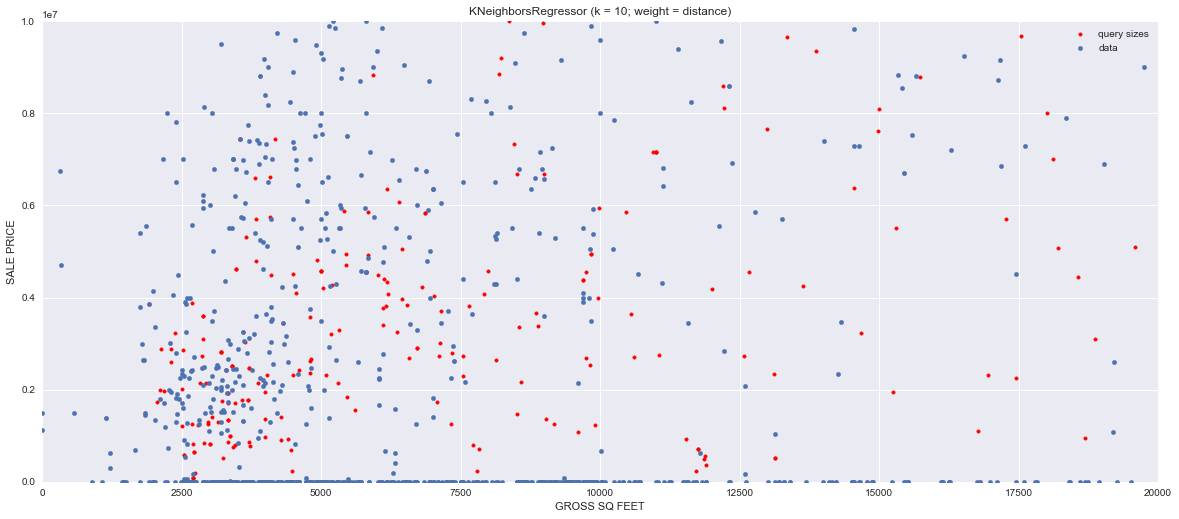

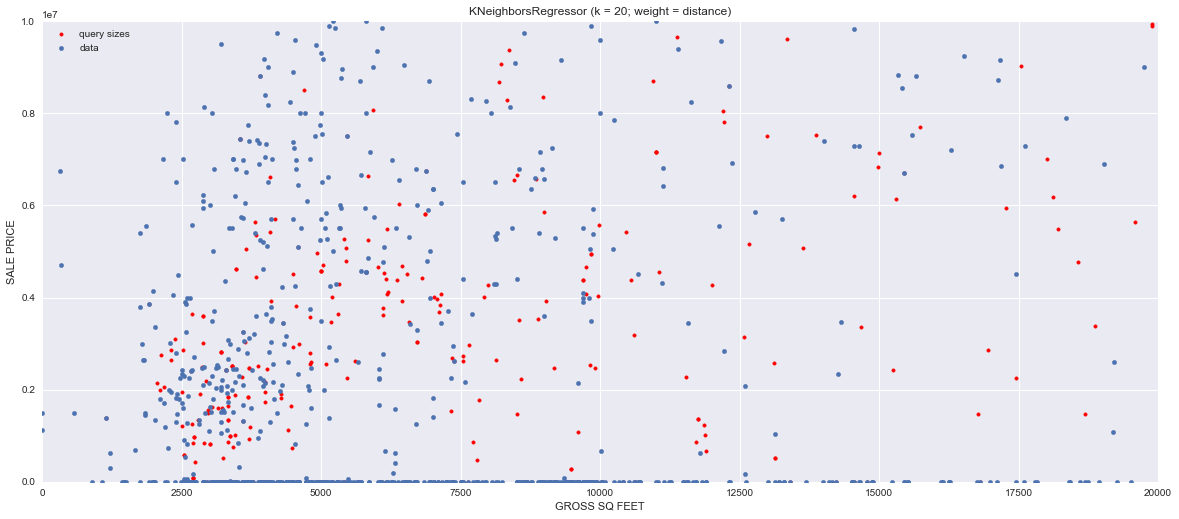

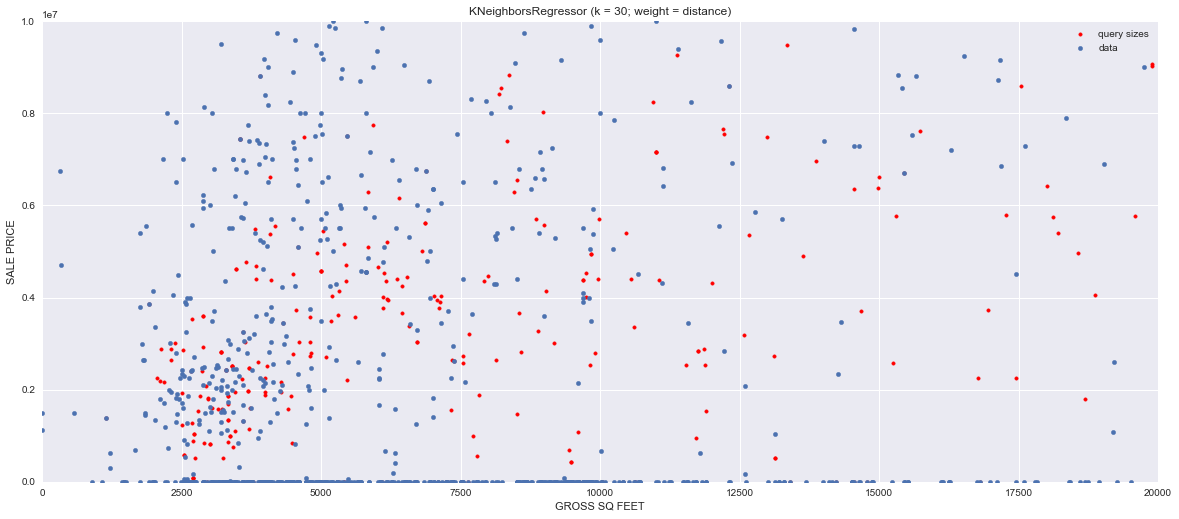

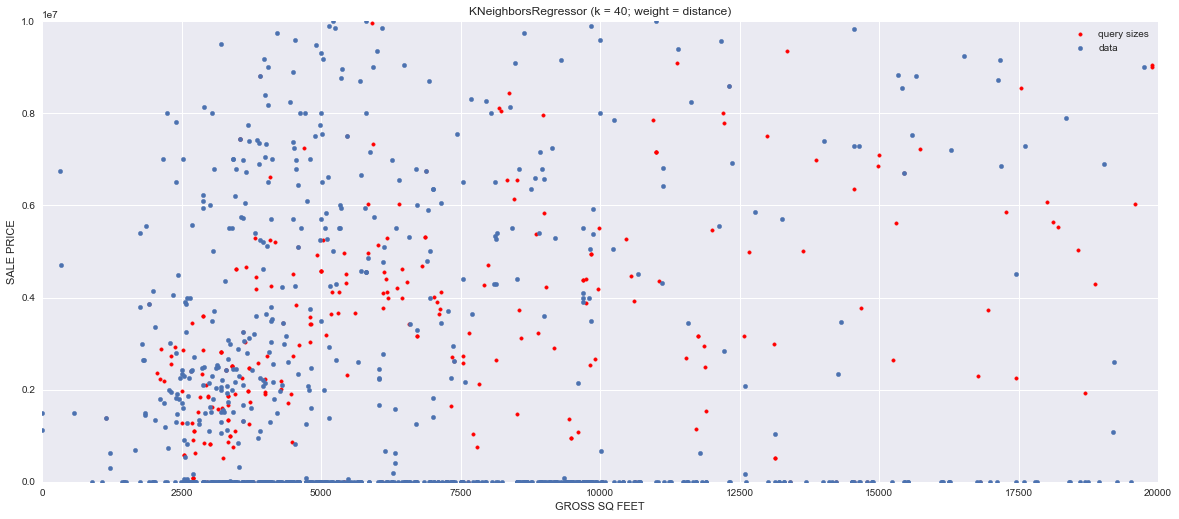

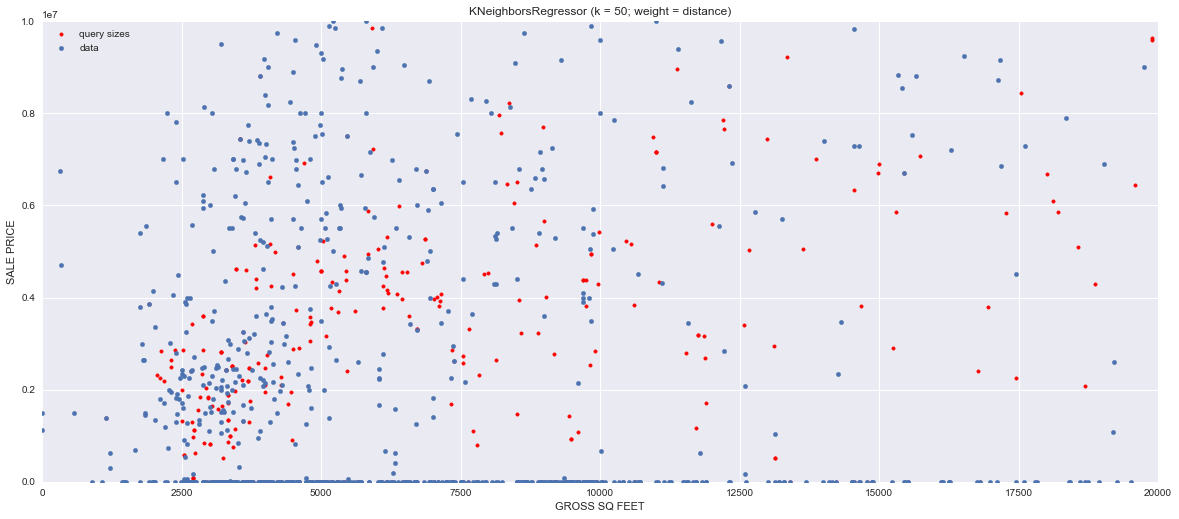

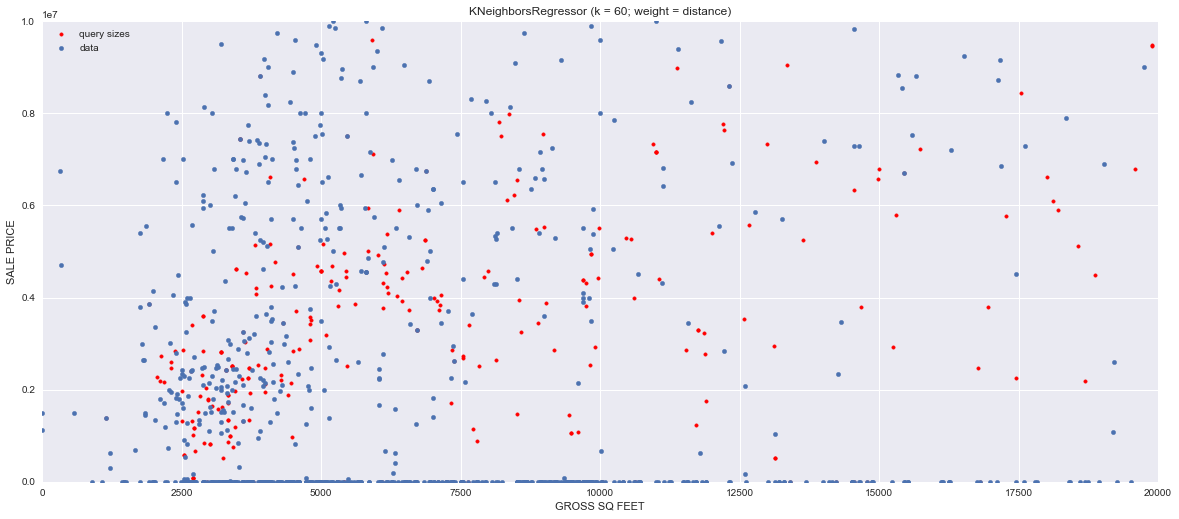

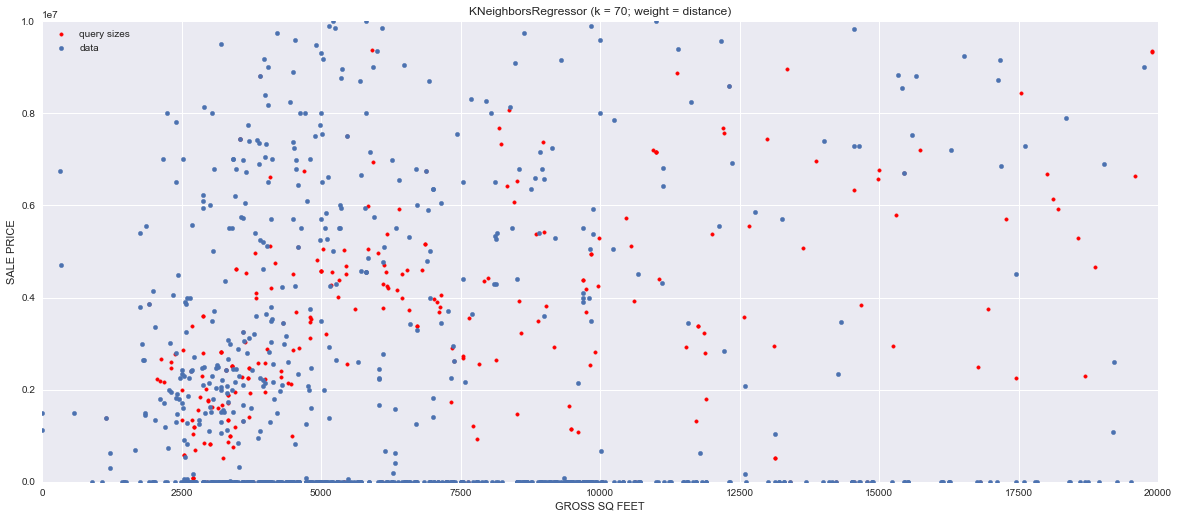

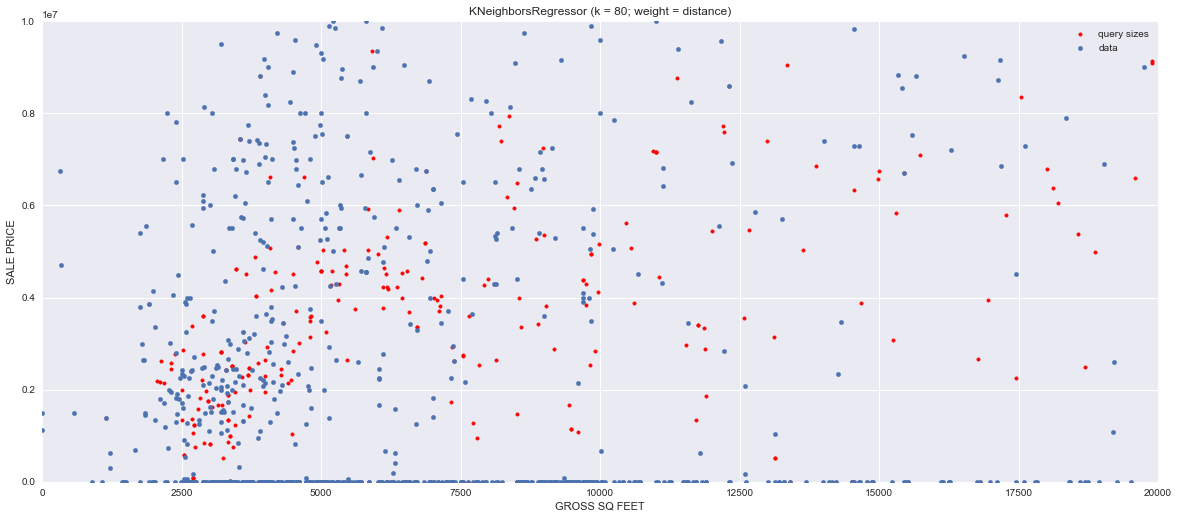

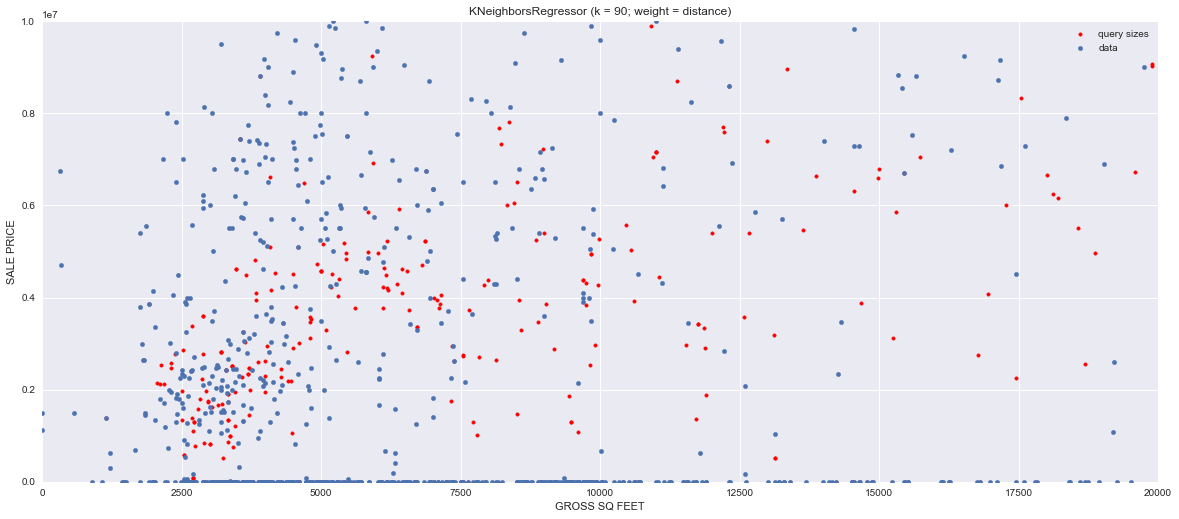

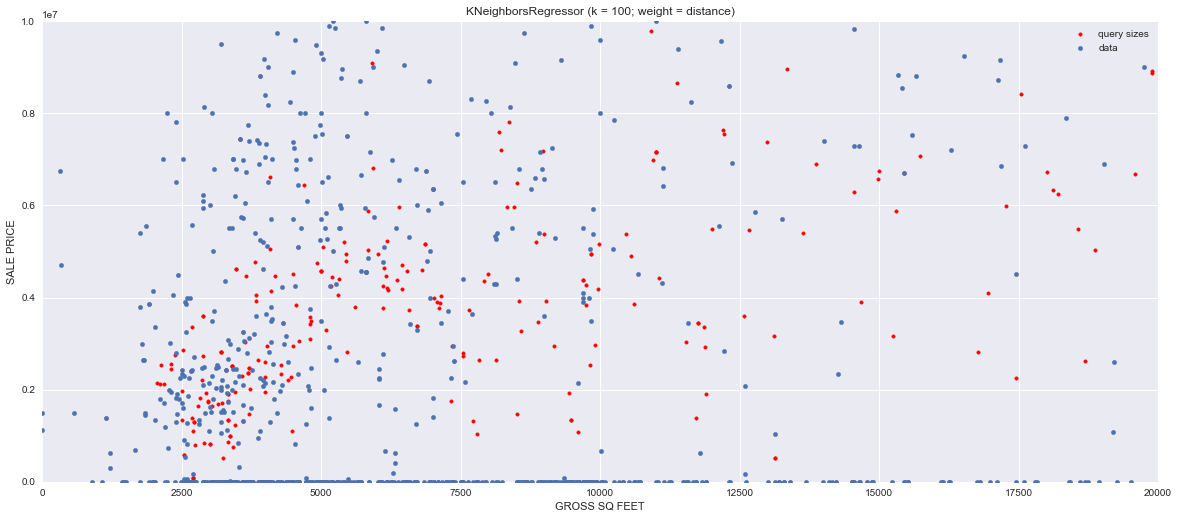

In [29]:
plot_no = 0 
for n in range(10,101,10):

    knn = KNeighborsRegressor(n_neighbors=n, weights='distance') # default neighbor = 1; default weight = uniform
    knn.fit(X_train.values.reshape(-1,1), y_train)

    y_preds = knn.predict(X_test.values.reshape(-1,1))
    
    plt.figure(figsize=(20, 100))
    plt.subplot(10, 1, plot_no+1)
    plt.ylim([0,10000000])
    plt.xlim([0,20000])
    plt.scatter(X_test,y_preds, label='query sizes', marker='.', c='r',s=50)
    plt.scatter(X_train,y_train, label='data', s=20)
    #plt.plot(X_test,y_preds, label='predicted prices', c='y')
    plt.xlabel('GROSS SQ FEET')
    plt.ylabel('SALE PRICE')
    #plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i; weight = distance)" % (n))
    
plt.show()

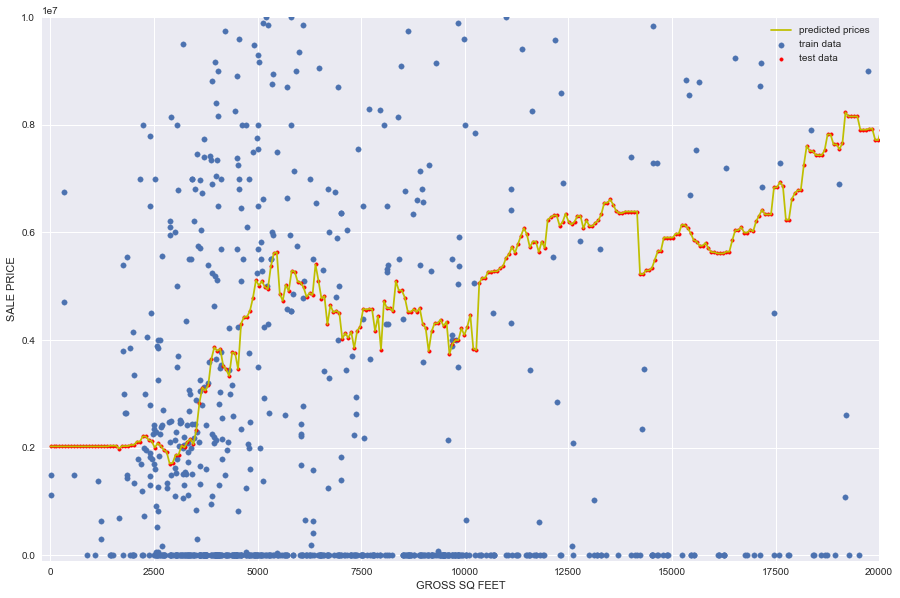

In [78]:
knn = KNeighborsRegressor(n_neighbors=100) # default neighbor = 1; default weight = uniform
knn.fit(X_train.values.reshape(-1,1), y_train)


T = np.linspace(df['GROSS SQUARE FEET'].min(),df['GROSS SQUARE FEET'].max(),30000).reshape(-1,1)

y_preds = knn.predict(T)

plt.figure(figsize=(15, 10))
plt.scatter(X_train,y_train, label='train data', s=30)
plt.scatter(T,y_preds, label='test data', marker='.', c='r',s=50)
plt.plot(T,y_preds, label='predicted prices', c='y')
plt.xlabel('GROSS SQ FEET')
plt.ylabel('SALE PRICE')
plt.ylim([-100000,10000000])
plt.xlim([-200,20000])
#plt.axis('tight')
plt.legend()

plt.show()


### K-NN Parameter Tuning & Cross-Validation